<a href="https://colab.research.google.com/github/dananjayakumar/Ic-engine/blob/main/customer_churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

Domain Topic Telecom Churn Analysis Telecom Churn (loss of customers to competition) is a problem for telecom companies because it is expensive to acquire a new customer and companies want to retain their existing customers. Most telecom companies suffer from voluntary churn.

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can priorities focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

I will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.



In [ ]:
from google.colab import files
upload=files.upload

<font color = red>Importing and Analyzing the data set

Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Read the dataset

In [ ]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


I will start by talking about each column and it's content.

customerID: Simply, the id for each customer.

gender: Whether the customer is a male or a female.

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).

Partner: Whether the customer has a partner or not (Yes, No).

Dependnts : Whether the customer has dependents or not (Yes, No).

tenure : Number of months the customer has stayed with the company.

PhoneService : Whether the customer has a phone service or not (Yes, No).

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service).

InternetService : Customer’s internet service provider (DSL, Fiber optic, No).

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service).

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service).

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service).

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service).

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service).

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service).

Contract : The contract term of the customer (Month-to-month, One year, Two year).

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No).

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

MonthlyCharges : The amount charged to the customer monthly.

TotalCharges : The total amount charged to the customer.

churn : Whether the customer churned or not (Yes or No).

In [ ]:
#descriptive analysis of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#checking for the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

this dataset doesnot contain any null values

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#drop the unnessecery column
df.drop(columns='customerID',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#the unique values in each column are
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
#cnverting from object to numeric column
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


After converting the column in to numeric found some null values.

Since it is a small number drop it.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(7032, 20)

Maping the numeric col to object col for EDA process.

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [ ]:
df.drop(labels=df[df['tenure']=='0'].index,axis=0,inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#check for the duplicate values
df.duplicated().sum()

22

drop the duplicated values from the dataset

In [ ]:
df = df.drop_duplicates()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df['Churn'].replace(to_replace = 'No',  value = 0, inplace = True)

<AxesSubplot:xlabel='Churn', ylabel='count'>

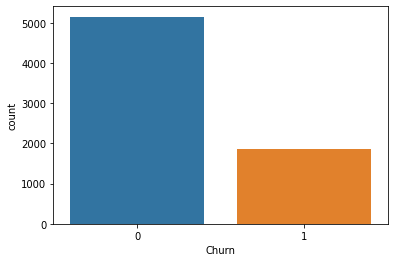

In [ ]:
sns.countplot(data = df, x = 'Churn')

Observation:

it seen from the graph that max of the customers are not churning

<AxesSubplot:>

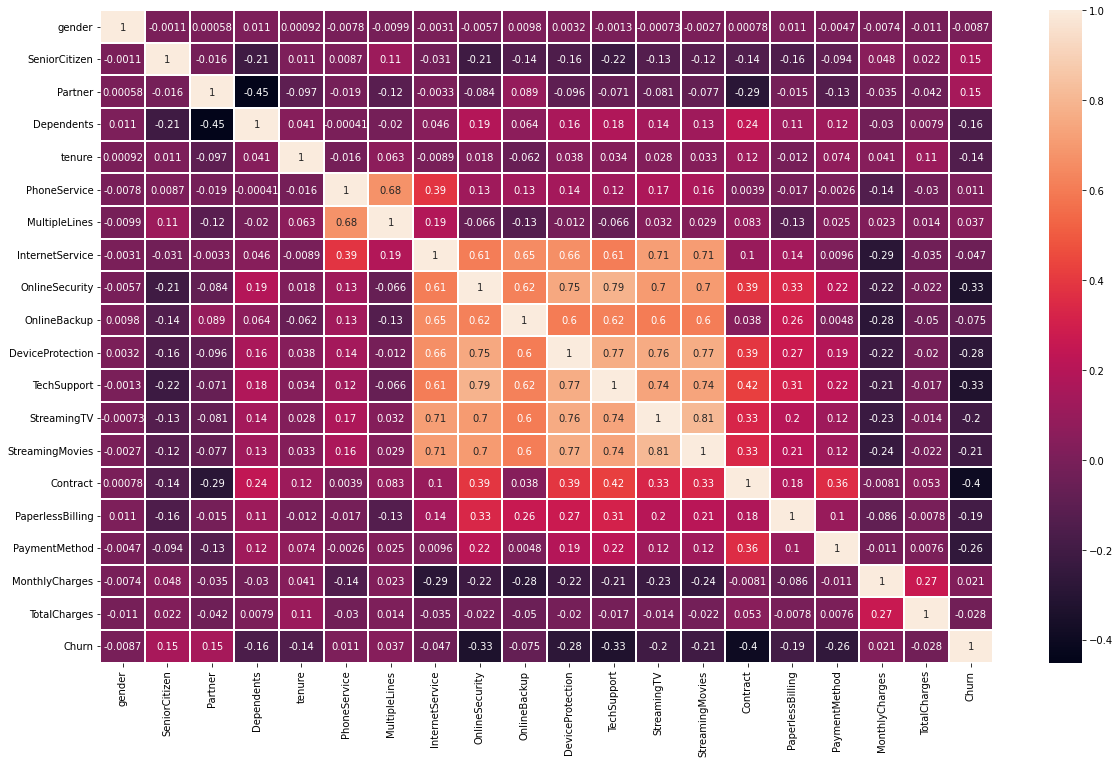

In [ ]:
plt.figure(figsize=(20, 12))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr,linewidths=.2, annot = True)

Observation:

from the heat map its understood that monthly charge,seniore citizen and partners are tend to have more chances of churning because these columns are positevly corealated with churn column

the remaing column have negativly corelated to churn column so that columns are not affects the customer to churn

**data exploration**

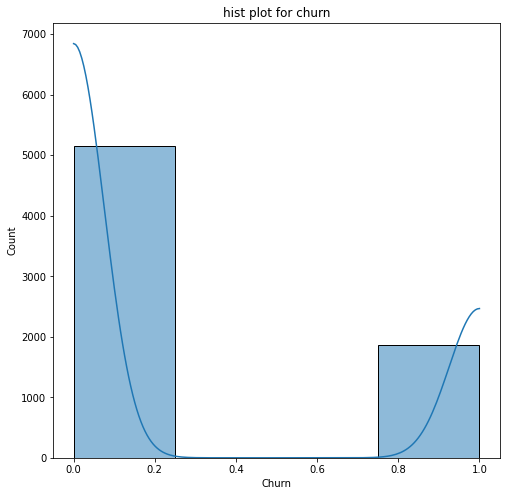

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(df['Churn'],kde=True,bins=4)
plt.title('hist plot for churn')
plt.show()

Observation:

it seen from the hist plot that max of the customers are not churning

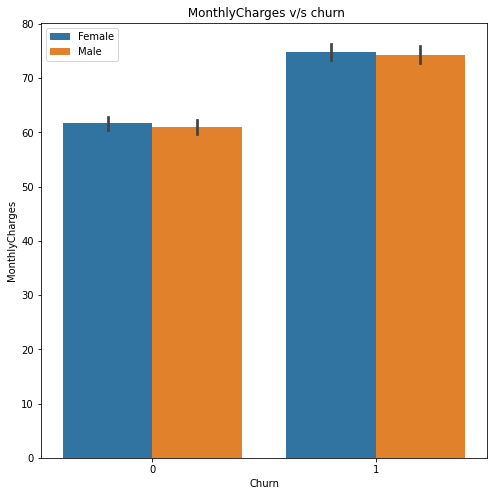

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='Churn',y='MonthlyCharges',hue='gender')
plt.title(' MonthlyCharges v/s churn')
plt.legend(loc='best')
plt.show()

observation:

1. if monthly charges are more then churning rate is also increases

2. male and feamle churn are almost same

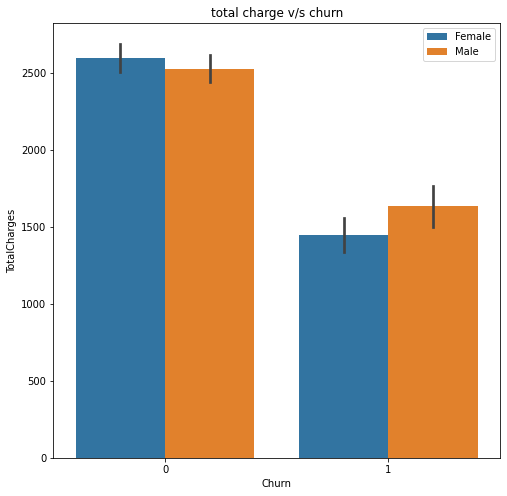

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='Churn',y='TotalCharges',hue='gender')
plt.title('total charge v/s churn')
plt.legend(loc='best')
plt.show()

observation:

1. If total charges is bit affecting the curn

2. Feamle customer are churning more due to this total charge as compare to Male customer

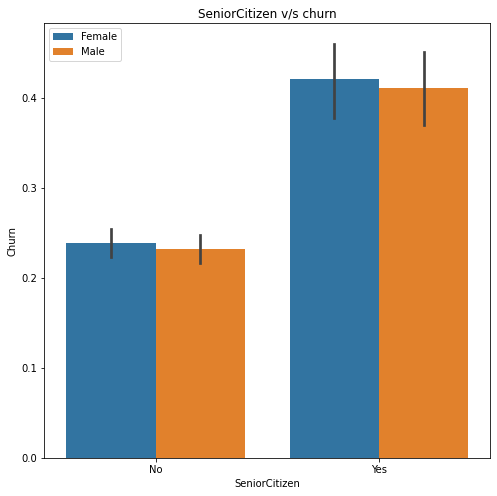

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,y='Churn',x='SeniorCitizen',hue='gender')
plt.title('SeniorCitizen v/s churn')
plt.legend(loc='best')
plt.show()

observation:

1. The senior citizens are churning more


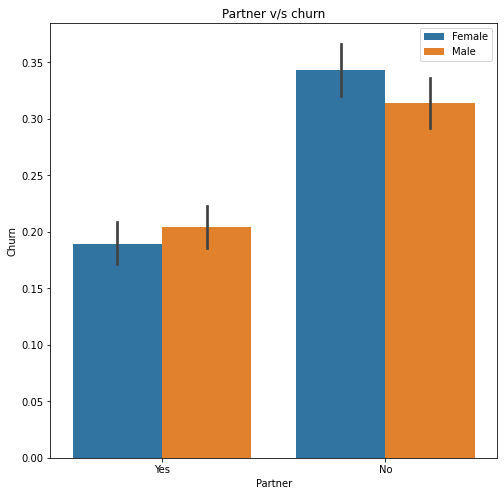

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,y='Churn',x='Partner',hue='gender')
plt.title('Partner v/s churn')
plt.legend(loc='best')
plt.show()

Observation:
1. the customer who dont have partners are churning more as compare to who have partner

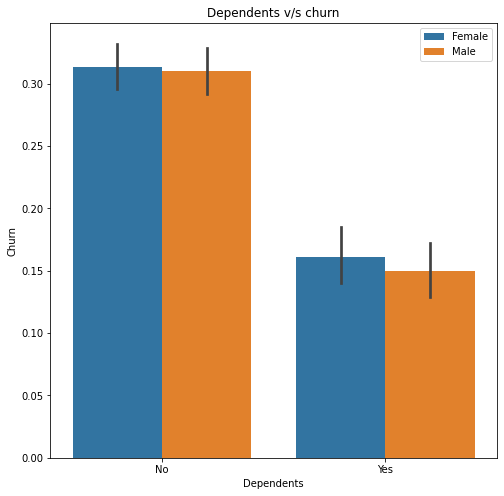

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,y='Churn',x='Dependents',hue='gender')
plt.title('Dependents v/s churn')
plt.legend(loc='best')
plt.show()

observation:

1. the independent customers are churning more

2. both male and female have almost same rate of churn

In [ ]:
df.gender.value_counts(normalize=True)*100

Male      50.42796
Female    49.57204
Name: gender, dtype: float64

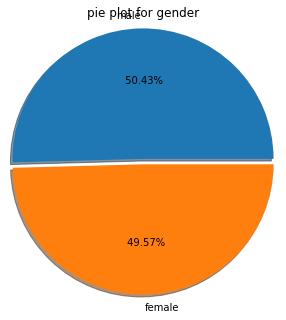

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['gender'].value_counts(),labels=['male','female'],
autopct=' %0.2f%%',shadow=True,
labeldistance=1.1,colors=None,radius=1.2,explode=(0.0,0.05))
plt.title('pie plot for gender',loc='center')
plt.show()

observation:

1. 50.48% of the customers are male
2. 49.52% of customers are Female

In [ ]:
df['SeniorCitizen'].value_counts(normalize=True)*100

No     83.723252
Yes    16.276748
Name: SeniorCitizen, dtype: float64

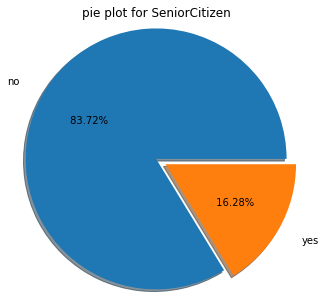

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['SeniorCitizen'].value_counts(),labels=['no','yes'],
autopct=' %0.2f%%',shadow=True,
labeldistance=1.2,colors=None,radius=1.2,explode=(0.0,0.1))
plt.title('pie plot for SeniorCitizen',loc='center')
plt.show()

observation:

1. only 16.21 % of the cusomers are senior citizens

In [ ]:
df['Partner'].value_counts(normalize=True)*100

No     51.597718
Yes    48.402282
Name: Partner, dtype: float64

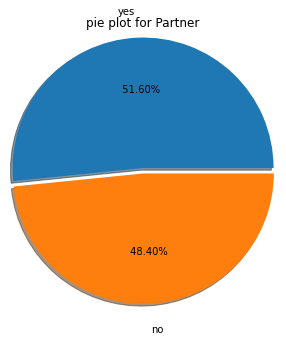

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['Partner'].value_counts(),labels=['yes','no'],
autopct=' %0.2f%%',shadow=True,
labeldistance=1.2,colors=None,radius=1.2,explode=(0.0,0.05))
plt.title('pie plot for Partner',loc='center')
plt.show()

Observtion:

1. 48.30 % customers are independent

In [ ]:
df.PhoneService.value_counts(normalize=True)*100

Yes    90.299572
No      9.700428
Name: PhoneService, dtype: float64

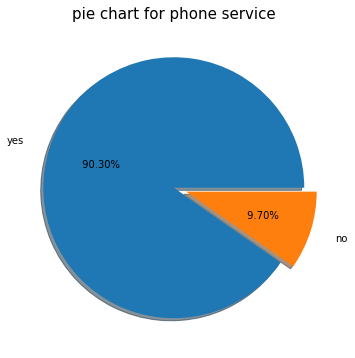

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df.PhoneService.value_counts(),labels=('yes','no'),
autopct=' %0.2f%%',shadow=True,labeldistance=1.2,explode=(0.0,0.1),colors=None,radius=1)
plt.title('pie chart for phone service',loc='center',size=15 )
plt.show()

observation:

1. 90.30 % of customer with phone service and only 9.70 % of customers are not having this service

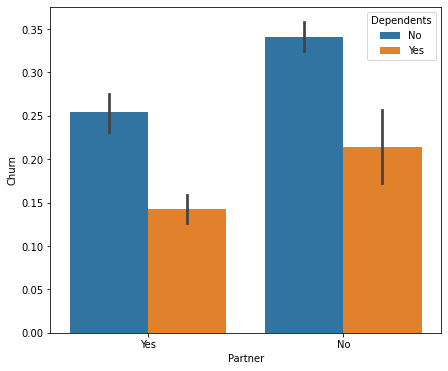

In [ ]:
plt.figure(figsize = (7, 6))
sns.barplot(data = df, x = 'Partner', y = 'Churn', hue = 'Dependents')
plt.show()

observation:

1. Independent customers are churning more
2. the customer with no parners are churning more

In [ ]:
df.InternetService.value_counts()

Fiber optic    3090
DSL            2414
No             1506
Name: InternetService, dtype: int64

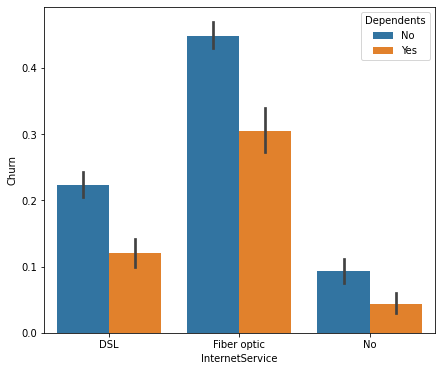

In [ ]:
plt.figure(figsize = (7, 6))
sns.barplot(data=df,x='InternetService',y='Churn',hue='Dependents')
plt.show()

observation:

1.the independent customer with fiber optic internet service are churning are more as compare to other

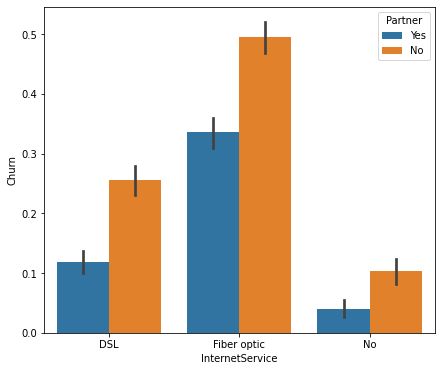

In [ ]:
plt.figure(figsize = (7, 6))
sns.barplot(data=df,x='InternetService',y='Churn',hue='Partner')
plt.show()

observation:

1.the customer with no partner using fiber optic internet service are churning are more as compare to other

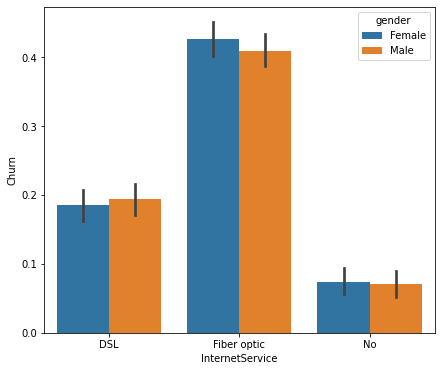

In [ ]:
plt.figure(figsize = (7, 6))
sns.barplot(data=df,x='InternetService',y='Churn',hue='gender')
plt.show()

observation:

1.the male and female customer  using fiber optic internet service are churning are more as compare to other

In [ ]:
df.TechSupport.value_counts()

No                     3464
Yes                    2040
No internet service    1506
Name: TechSupport, dtype: int64

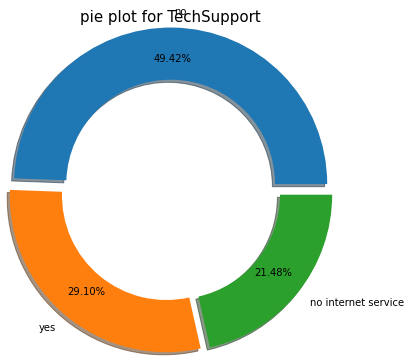

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df.TechSupport.value_counts(),labels=('no','yes','no internet service'),
  colors=None,autopct='%0.2f%%',pctdistance=0.8,shadow=True,labeldistance=1.1,
  radius=1.2, wedgeprops={'width':0.4},explode=(0.05,0.05,0.05))
plt.title('pie plot for TechSupport',loc='center',size=15)
plt.show()

observation:

1. 49.42 % of the customers are with no tech support
2. only 29.10 % of the customer are with tech support

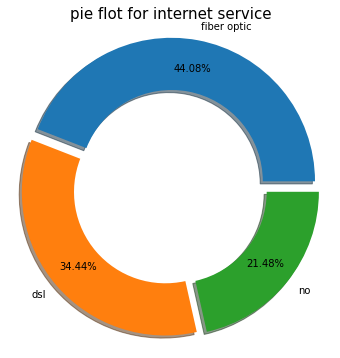

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df.InternetService.value_counts(),labels=('fiber optic','dsl','no'),
autopct='%0.2f%%',explode=(0.05,0.05,0.05),colors=None,
shadow=True,labeldistance=1.1,radius=1.1,pctdistance=0.8,wedgeprops={'width':0.4})
plt.title('pie flot for internet service',loc='center',size=15)
plt.show()

observation:

1. 44.08 % of the customers are using fiber optic internet service
2. 21.48 % of the customer are not at all using the internet service

In [ ]:
#checking the object column in the dataset
def print_unique_col_values(df):
    for i in df:
        if df[i].dtypes == 'object':
            print(f'{i}:{df[i].unique()}')

In [ ]:
print_unique_col_values(df)

gender:['Female' 'Male']
SeniorCitizen:['No' 'Yes']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [ ]:
print_unique_col_values(df)

gender:['Female' 'Male']
SeniorCitizen:['No' 'Yes']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
#replacing the catgorical col to numeric column
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_columns:
    df[i].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
df['gender'].replace({'Male':1,'Female':0},inplace=True)

In [ ]:
df['SeniorCitizen'].replace({'No':1,'Yes':0},inplace=True)

In [ ]:
df1=['tenure','MonthlyCharges','TotalCharges']

In [ ]:
# encoding the object values to its numeric values using dummy encoder
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7010 non-null   int64  
 1   SeniorCitizen                            7010 non-null   int64  
 2   Partner                                  7010 non-null   int64  
 3   Dependents                               7010 non-null   int64  
 4   tenure                                   7010 non-null   int64  
 5   PhoneService                             7010 non-null   int64  
 6   MultipleLines                            7010 non-null   int64  
 7   OnlineSecurity                           7010 non-null   int64  
 8   OnlineBackup                             7010 non-null   int64  
 9   DeviceProtection                         7010 non-null   int64  
 10  TechSupport                              7010 no

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,1,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,1,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,1,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,1,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
#checking for the descriptive anlysis for outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7010.0,0.504280,0.500017,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7010.0,0.837233,0.369180,0.00,1.0000,1.000,1.0000,1.00
Partner,7010.0,0.484023,0.499780,0.00,0.0000,0.000,1.0000,1.00
Dependents,7010.0,0.299429,0.458041,0.00,0.0000,0.000,1.0000,1.00
tenure,7010.0,32.520399,24.520441,1.00,9.0000,29.000,56.0000,72.00
PhoneService,7010.0,0.902996,0.295985,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7010.0,0.423252,0.494110,0.00,0.0000,0.000,1.0000,1.00
OnlineSecurity,7010.0,0.287447,0.452604,0.00,0.0000,0.000,1.0000,1.00
OnlineBackup,7010.0,0.345934,0.475706,0.00,0.0000,0.000,1.0000,1.00
DeviceProtection,7010.0,0.344936,0.475381,0.00,0.0000,0.000,1.0000,1.00


**Detecting the outliers using boxplot**

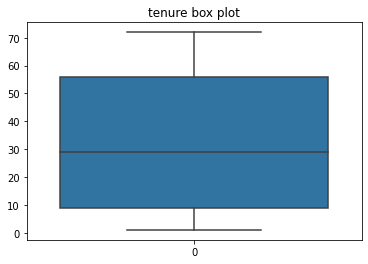

In [ ]:
sns.boxplot(data=df['tenure'])
plt.title('tenure box plot')
plt.show()

In [ ]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

cross verifieng the outliers using IQR method

In [ ]:
q1=df['tenure'].quantile(0.25)
q3=df['tenure'].quantile(0.75)
iqr=q3-q1

In [ ]:
q1,q3,iqr

(9.0, 56.0, 47.0)

In [ ]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

removing outliers if present in the dataset

In [ ]:
df.loc[(df['tenure']>upper_limit)|(df['tenure']<lower_limit)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check


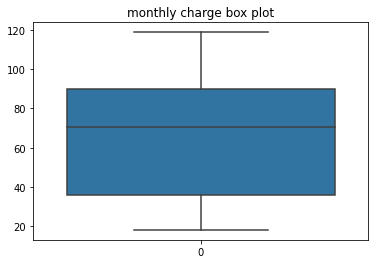

In [ ]:
sns.boxplot(data=df['MonthlyCharges'])
plt.title('monthly charge box plot')
plt.show()

In [ ]:
q1=df['MonthlyCharges'].quantile(0.25)
q3=df['MonthlyCharges'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [ ]:
df.loc[(df['MonthlyCharges']>upper_limit)|(df['MonthlyCharges']<lower_limit)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check


<AxesSubplot:>

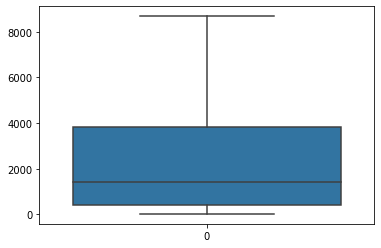

In [ ]:
sns.boxplot(data=df['TotalCharges'])

In [ ]:
q1=df['TotalCharges'].quantile(0.25)
q3=df['TotalCharges'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [ ]:
df.loc[(df['TotalCharges']>upper_limit)|(df['TotalCharges']<lower_limit)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check


Observations:


it is observed that from the box plot  as well as from the IQr method that we dont have any outliers in the data set

**feauture engineering**

splitting the dataset


In [ ]:
x=df.drop(columns='Churn')
y=df['Churn']

In [ ]:
x.shape,y.shape

((7010, 26), (7010,))

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

standardizing the dataset using min max scaler function

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**model building using different classification algorithems**

logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred_=pd.DataFrame(y_pred,columns=['predict'])
y_pred_.head()

,predict
0,0
1,0
2,0
3,1
4,0


In [ ]:
y_test_=pd.DataFrame(y_test.values,columns=['actual'])
y_test_.head()

,actual
0,0
1,0
2,0
3,1
4,0


In [ ]:
final_predict_lr=pd.concat([y_pred_, y_test_],join='inner',axis=1)
print('The predicted and actual values for the logistic regresion is:')
final_predict_lr.head()

The predicted and actual values for the logistic regresion is:


,predict,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,classification_report,accuracy_score,confusion_matrix

In [ ]:
print(accuracy_score(y_test,y_pred))
print('-'*50)
print(confusion_matrix(y_pred,y_test))
print('-'*50)
print(roc_auc_score(y_pred,y_test))
print('-'*100)
print(roc_curve(y_pred,y_test))
print('-'*100)
print(f1_score(y_pred,y_test))
print('-'*100)
print(classification_report(y_pred,y_test))

0.797432239657632
--------------------------------------------------
[[905 159]
 [125 213]]
--------------------------------------------------
0.7403707122836677
----------------------------------------------------------------------------------------------------
(array([0.        , 0.14943609, 1.        ]), array([0.        , 0.63017751, 1.        ]), array([2, 1, 0]))
----------------------------------------------------------------------------------------------------
0.6000000000000001
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1064
           1       0.57      0.63      0.60       338

    accuracy                           0.80      1402
   macro avg       0.73      0.74      0.73      1402
weighted avg       0.80      0.80      0.80      1402



Random forest algorithem

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rf.predict(x_test)
y_pred_rf=pd.DataFrame(y_pred_rf,columns=['predict'])
y_pred_rf.head()

,predict
0,0
1,0
2,0
3,1
4,0


In [ ]:
y_actual_rf=pd.DataFrame(y_test.values,columns=['actual'])
y_actual_rf.head()

,actual
0,0
1,0
2,0
3,1
4,0


In [ ]:
final_result_rf=pd.concat([y_pred_rf,y_actual_rf],join='inner',axis=1)
final_result_rf.head()

,predict,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,classification_report,accuracy_score,confusion_matrix

In [ ]:
print(accuracy_score(y_test,y_pred_rf))
print('-'*50)
print(confusion_matrix(y_pred_rf,y_test))
print('-'*50)
print(roc_auc_score(y_pred_rf,y_test))
print('-'*100)
print(roc_curve(y_pred_rf,y_test))
print('-'*100)
print(f1_score(y_pred_rf,y_test))
print('-'*100)
print(classification_report(y_pred_rf,y_test))

0.7860199714693296
--------------------------------------------------
[[914 184]
 [116 188]]
--------------------------------------------------
0.7254218195762631
----------------------------------------------------------------------------------------------------
(array([0.        , 0.16757741, 1.        ]), array([0.        , 0.61842105, 1.        ]), array([2, 1, 0]))
----------------------------------------------------------------------------------------------------
0.5562130177514794
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1098
           1       0.51      0.62      0.56       304

    accuracy                           0.79      1402
   macro avg       0.70      0.73      0.71      1402
weighted avg       0.80      0.79      0.79      1402



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier()
param_grid = { "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(rf, param_grid)

grid.fit(x_train, y_train)

print(grid.best_score_ , grid.best_params_)

0.7958300536985534 {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


In [ ]:
y_pred_grid_rf=grid.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_grid_rf,y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1082
           1       0.53      0.62      0.58       320

    accuracy                           0.79      1402
   macro avg       0.71      0.73      0.72      1402
weighted avg       0.80      0.79      0.80      1402



decission tree algorithem

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=dt.predict(x_test)
y_pred_dt=pd.DataFrame(y_pred_dt,columns=['predicted'])
y_pred_dt.head()

,predicted
0,0
1,0
2,0
3,0
4,0


In [ ]:
dt_act_dt=pd.DataFrame(y_test.values,columns=['actual'])
dt_act_dt.head()

,actual
0,0
1,0
2,0
3,1
4,0


In [ ]:
final_pred_dt=pd.concat([y_pred_dt,dt_act_dt],join='inner',axis=1)
print('The predicted and actual values for the decision tree classfier is:')
final_pred_dt.head()

The predicted and actual values for the decision tree classfier is:


,predicted,actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [ ]:

from sklearn.metrics import roc_curve,roc_auc_score,f1_score,accuracy_score,confusion_matrix

In [ ]:
print(accuracy_score(y_test,y_pred_dt))
print('-'*100)
print(confusion_matrix(y_pred_dt,y_test))
print('-'*100)
print(roc_auc_score(y_pred_dt,y_test))
print('-'*100)
print(roc_curve(y_pred_dt,y_test))
print('-'*100)
print(f1_score(y_pred_dt,y_test))
print('-'*100)

0.7346647646219686
----------------------------------------------------------------------------------------------------
[[833 175]
 [197 197]]
----------------------------------------------------------------------------------------------------
0.6631944444444444
----------------------------------------------------------------------------------------------------
(array([0.        , 0.17361111, 1.        ]), array([0. , 0.5, 1. ]), array([2, 1, 0]))
----------------------------------------------------------------------------------------------------
0.5143603133159269
----------------------------------------------------------------------------------------------------


support vector machine algorithem

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='linear',random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_svm=svc.predict(x_test)
y_pred_svm=pd.DataFrame(y_pred_svm,columns=['predicted'])
y_pred_svm.head()

,predicted
0,0
1,0
2,1
3,1
4,0


In [ ]:
y_act_svm=pd.DataFrame(y_test.values,columns=['actual'])
y_act_svm.head()

,actual
0,0
1,0
2,0
3,1
4,0


In [ ]:
final_svm=pd.concat([y_pred_svm,y_act_svm],axis=1,join='inner')
final_svm.head()

,predicted,actual
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,accuracy_score,confusion_matrix,classification_report

In [ ]:
print(accuracy_score(y_pred_svm,y_act_svm))
print('-'*50)
print(confusion_matrix(y_pred_svm,y_act_svm))
print('-'*50)
print(f1_score(y_pred_svm,y_act_svm))
print('-'*50)
print(roc_auc_score(y_pred_svm,y_act_svm))
print('-'*50)
print(roc_curve(y_pred_svm,y_act_svm))
print('-'*100)
print(classification_report(y_pred_svm,y_act_svm))

0.797432239657632
--------------------------------------------------
[[917 171]
 [113 201]]
--------------------------------------------------
0.58600583090379
--------------------------------------------------
0.7414791354439864
--------------------------------------------------
(array([0.        , 0.15716912, 1.        ]), array([0.        , 0.64012739, 1.        ]), array([2, 1, 0]))
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1088
           1       0.54      0.64      0.59       314

    accuracy                           0.80      1402
   macro avg       0.72      0.74      0.73      1402
weighted avg       0.81      0.80      0.80      1402



Use the grid search cv to know the best combination of parameter to get the best values

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svm=SVC()
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma':['scale', 'auto'],
              'kernel': ['linear','rbf']}

grid = GridSearchCV(svm, param_grid)
grid.fit(x_train, y_train)

print(grid.best_params_)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_grid = grid.predict(x_test)

print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1030
           1       0.62      0.53      0.58       372

    accuracy                           0.79      1402
   macro avg       0.73      0.71      0.72      1402
weighted avg       0.78      0.79      0.79      1402



observation:

we found that even after the gridsearch the accurasy value dint get changed

K nearest kneignbors algorithem

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn= knn.predict(x_test)
y_pred_knn=pd.DataFrame(y_pred_knn,columns=['predicted'])

In [ ]:
y_act_knn=pd.DataFrame(y_test.values,columns=['actaul'])


In [ ]:
final_knn=pd.concat([y_act_knn,y_pred_knn],join='inner',axis=1)
final_knn.head()

,actaul,predicted
0,0,0
1,0,0
2,0,1
3,1,0
4,0,0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,accuracy_score,confusion_matrix

In [ ]:
print(accuracy_score(y_pred_knn,y_act_knn))
print('-'*50)
print(confusion_matrix(y_pred_knn,y_act_knn))
print('-'*50)
print(f1_score(y_pred_knn,y_act_knn))
print('-'*50)
print(roc_auc_score(y_pred_knn,y_act_knn))
print('-'*50)
print(roc_curve(y_pred_knn,y_act_knn))
print('-'*100)

0.7567760342368046
--------------------------------------------------
[[854 165]
 [176 207]]
--------------------------------------------------
0.5483443708609271
--------------------------------------------------
0.6892732597616564
--------------------------------------------------
(array([0.        , 0.16192345, 1.        ]), array([0.        , 0.54046997, 1.        ]), array([2, 1, 0]))
----------------------------------------------------------------------------------------------------


In [ ]:
y_pred_grid = grid.predict(x_test)

Stochastic Gradient Descent algorithem

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd=SGDClassifier(loss='modified_huber',random_state=0)
sgd.fit(x_train,y_train)

SGDClassifier(loss='modified_huber', random_state=0)

In [ ]:
y_pred_sgd=sgd.predict(x_test)
y_pred_sgd=pd.DataFrame(y_pred_sgd,columns=['predicted'])

In [ ]:
y_act_sgd=pd.DataFrame(y_test.values,columns=['actual'])

In [ ]:
final_sgd=pd.concat([y_pred_sgd,y_act_sgd],axis=1,join='inner')
final_sgd.head()

,predicted,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,accuracy_score,confusion_matrix

In [ ]:
print(accuracy_score(y_pred_sgd,y_act_sgd))
print('-'*50)
print(confusion_matrix(y_pred_sgd,y_act_sgd))
print('-'*50)
print(f1_score(y_pred_sgd,y_act_sgd))
print('-'*50)
print(roc_auc_score(y_pred_sgd,y_act_sgd))
print('-'*50)
print(roc_curve(y_pred_sgd,y_act_sgd))
print('-'*100)

0.7767475035663338
--------------------------------------------------
[[972 255]
 [ 58 117]]
--------------------------------------------------
0.4277879341864717
--------------------------------------------------
0.7303737338456164
--------------------------------------------------
(array([0.        , 0.20782396, 1.        ]), array([0.        , 0.66857143, 1.        ]), array([2, 1, 0]))
----------------------------------------------------------------------------------------------------


Ada boost classifier

In [ ]:
#manually checking the best parameter using for loop
boosting=[]
for n in [50,100,200,500,1000]:
  for l in [0.01,0.05,0.1,0.2,0.5,1]:

    abc = AdaBoostClassifier(n_estimators=n, learning_rate=l, random_state=0)
    abc.fit(x_train,y_train)
    y_pred = abc.predict(x_test)
    boosting.append(accuracy_score(y_test,y_pred))
    print(n,l,accuracy_score(y_test,y_pred))
print(max(boosting))

50 0.01 0.7346647646219686
50 0.05 0.7796005706134094
50 0.1 0.7938659058487875
50 0.2 0.8009985734664765
50 0.5 0.8038516405135521
50 1 0.8081312410841655
100 0.01 0.7346647646219686
100 0.05 0.7945791726105563
100 0.1 0.8002853067047075
100 0.2 0.8038516405135521
100 0.5 0.8052781740370899
100 1 0.8067047075606276
200 0.01 0.7667617689015692
200 0.05 0.797432239657632
200 0.1 0.8052781740370899
200 0.2 0.8059914407988588
200 0.5 0.8052781740370899
200 1 0.8002853067047075
500 0.01 0.7945791726105563
500 0.05 0.8059914407988588
500 0.1 0.8067047075606276
500 0.2 0.8009985734664765
500 0.5 0.8009985734664765
500 1 0.796718972895863
1000 0.01 0.7952924393723253
1000 0.05 0.8059914407988588
1000 0.1 0.8017118402282454
1000 0.2 0.8031383737517832
1000 0.5 0.8009985734664765
1000 1 0.797432239657632
0.8081312410841655


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
abc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, random_state=0)

In [ ]:
y_pred_abc=abc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1030
           1       0.66      0.57      0.61       372

    accuracy                           0.81      1402
   macro avg       0.76      0.73      0.74      1402
weighted avg       0.80      0.81      0.80      1402



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
abc=AdaBoostClassifier()
param_grid = {'n_estimators': [10,50,100,200,300,500],
              'learning_rate': [0.01,0.05,0.1,0.5,1]}
grid = GridSearchCV(abc, param_grid)
grid.fit(x_train, y_train)

print(grid.best_params_)

{'learning_rate': 0.1, 'n_estimators': 300}


In [ ]:
y_pred_abc_grid=grid.predict(x_test)

In [ ]:
print(classification_report(y_pred_abc_grid,y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1071
           1       0.58      0.65      0.61       331

    accuracy                           0.81      1402
   macro avg       0.73      0.75      0.74      1402
weighted avg       0.82      0.81      0.81      1402



In [ ]:
print('*'*150)

******************************************************************************************************************************************************


**Conclusion:**

**From all the model it is observed that the accuracy score for the Ada boost classifier is more has compare to all the algorithem i.e 81 %.**

**So Ada boost classifier is the best model fo the prediction of customer churn from the data set.**


In [ ]:
print('*'*150)

******************************************************************************************************************************************************
